In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

In [6]:
# Loading the dataset
airbnb_data = pd.read_csv('AB_NYC_2019.csv')


In [7]:
# Droping the columns with no useful information
airbnb_data.drop(columns=['id','host_name','last_review'], inplace=True)

In [8]:
# Ckecking for missing values
airbnb_data.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#Replacing all the missing values in 'name' with unkown
airbnb_data['name'].fillna('Unknown', inplace=True)

# Replacing all NaN values in 'reviews_per_month' with 0
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

# Examing changes
print(airbnb_data.shape)
airbnb_data.isnull().sum()

(48895, 13)


name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
print(airbnb_data.head(5))

                                               name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225            

In [12]:
# Removing the duplicate rows
airbnb_data.drop_duplicates(inplace=True)

Skew: 19.118938995046033
Kurtosis: 585.6728788988286


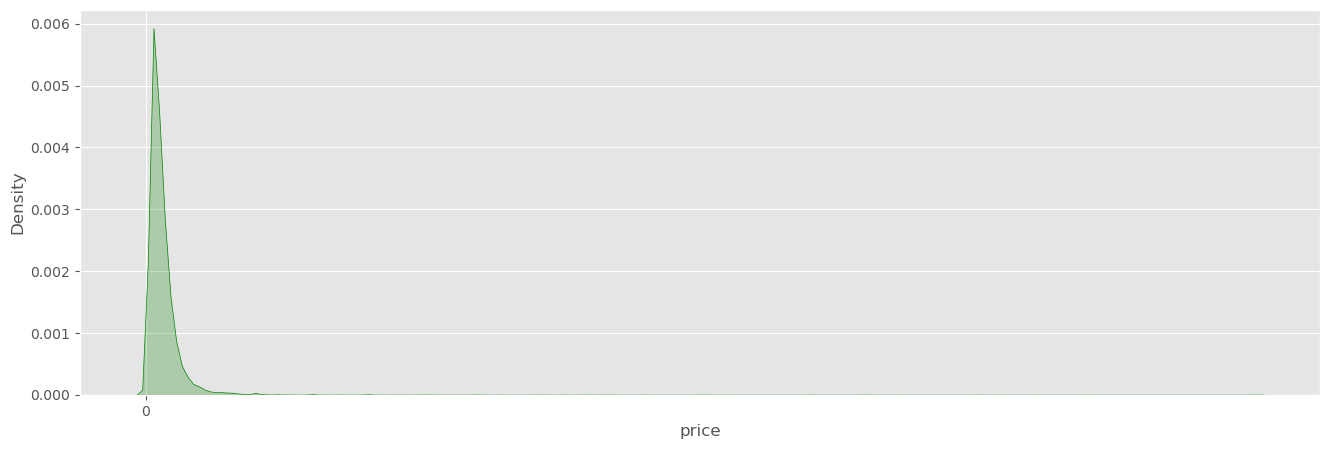

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(airbnb_data['price'].skew()))
print("Kurtosis: {}".format(airbnb_data['price'].kurtosis()))
ax = sns.kdeplot(airbnb_data['price'],fill=True,color='g')
plt.xticks([i for i in range(0,100,100)])
plt.show()

C:\Users\aadit\AppData\Local\Temp\ipykernel_27944\312115336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  AREA = sns.distplot(airbnb_data['price'])


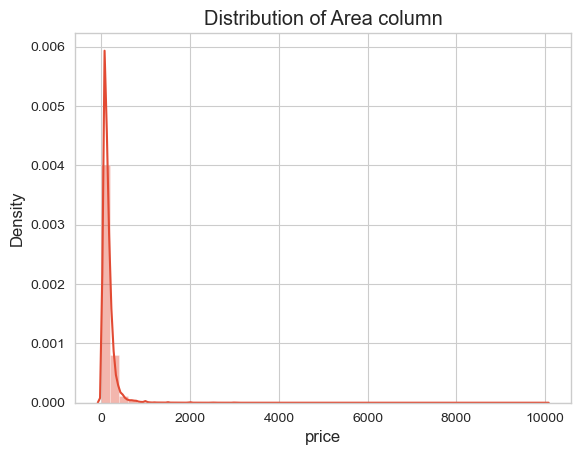

In [14]:
%matplotlib inline
sns.set_style('whitegrid')
AREA = sns.distplot(airbnb_data['price'])
AREA.set(title = "Distribution of Area column")
airbnb_data['price'].describe()
plt.show()

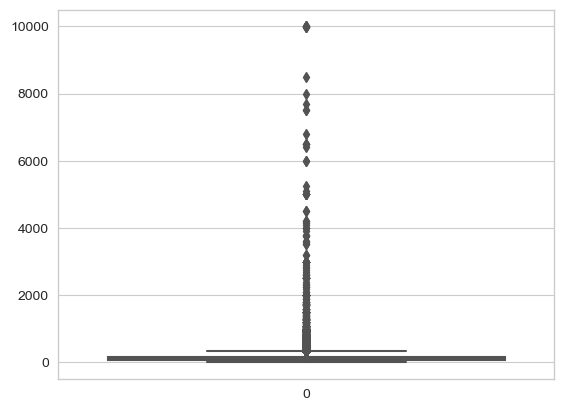

In [15]:
ax = sns.boxplot(airbnb_data['price'])
plt.show()

In [16]:
# Removing outliars after 2 standard deviations
mean_price = airbnb_data['price'].mean()
std_price = airbnb_data['price'].std()

# Setting the threshold for outliers as 2 standard deviations from the mean
lower_threshold = mean_price - 2 * std_price
upper_threshold = mean_price + 2 * std_price

# Removing outliers based on the defined thresholds
airbnb_data = airbnb_data[(airbnb_data['price'] >= lower_threshold) & (airbnb_data['price'] <= upper_threshold)]

In [17]:
airbnb_data.to_csv('processed_data.csv', index=False)

Skew: 1.7975082293696811
Kurtosis: 4.066795817973945


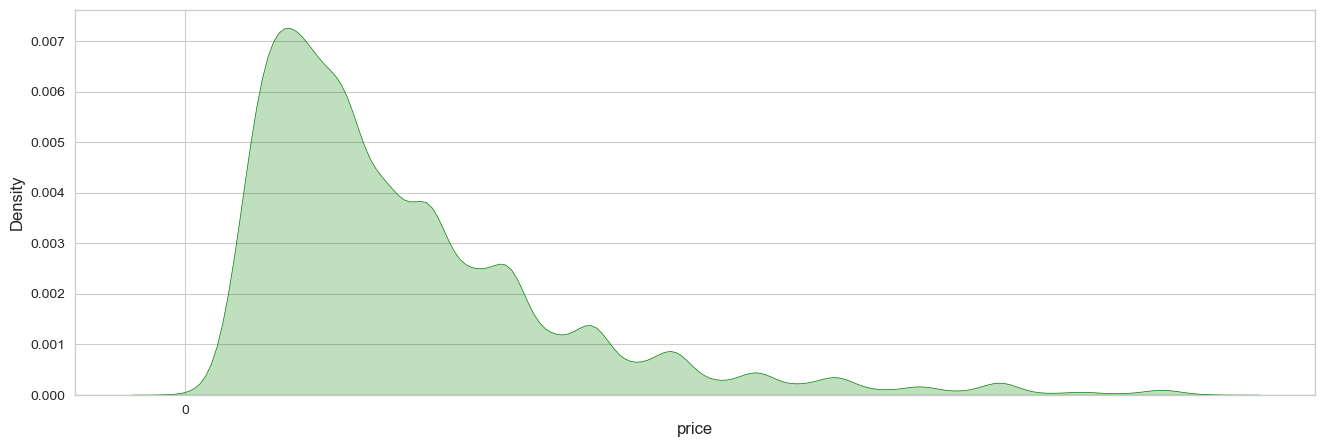

In [18]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(airbnb_data['price'].skew()))
print("Kurtosis: {}".format(airbnb_data['price'].kurtosis()))
ax = sns.kdeplot(airbnb_data['price'],fill=True,color='g')
plt.xticks([i for i in range(0,100,100)])
plt.show()

C:\Users\aadit\AppData\Local\Temp\ipykernel_27944\312115336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  AREA = sns.distplot(airbnb_data['price'])


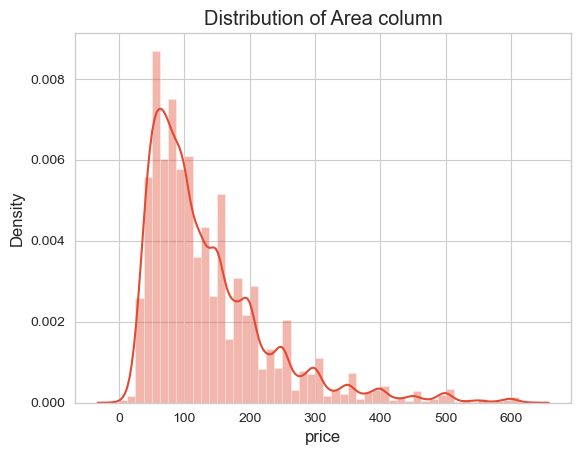

In [19]:
%matplotlib inline
sns.set_style('whitegrid')
AREA = sns.distplot(airbnb_data['price'])
AREA.set(title = "Distribution of Area column")
airbnb_data['price'].describe()
plt.show()

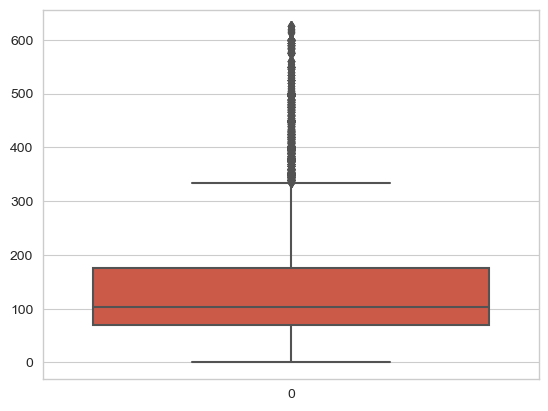

In [20]:
ax = sns.boxplot(airbnb_data['price'])
plt.show()

In [21]:
airbnb_data.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [22]:
# Creating a new derived attribute 'revenue'
airbnb_data['revenue'] = airbnb_data['price'] * airbnb_data['availability_365']

C:\Users\aadit\AppData\Local\Temp\ipykernel_27944\11275416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data['revenue'] = airbnb_data['price'] * airbnb_data['availability_365']


In [23]:
airbnb_data['revenue'].head(5)

0    54385
1    79875
2    54750
3    17266
4        0
Name: revenue, dtype: int64

C:\Users\aadit\AppData\Local\Temp\ipykernel_27944\1721920406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data['popularity_score'] = airbnb_data['number_of_reviews'] * airbnb_data['reviews_per_month']


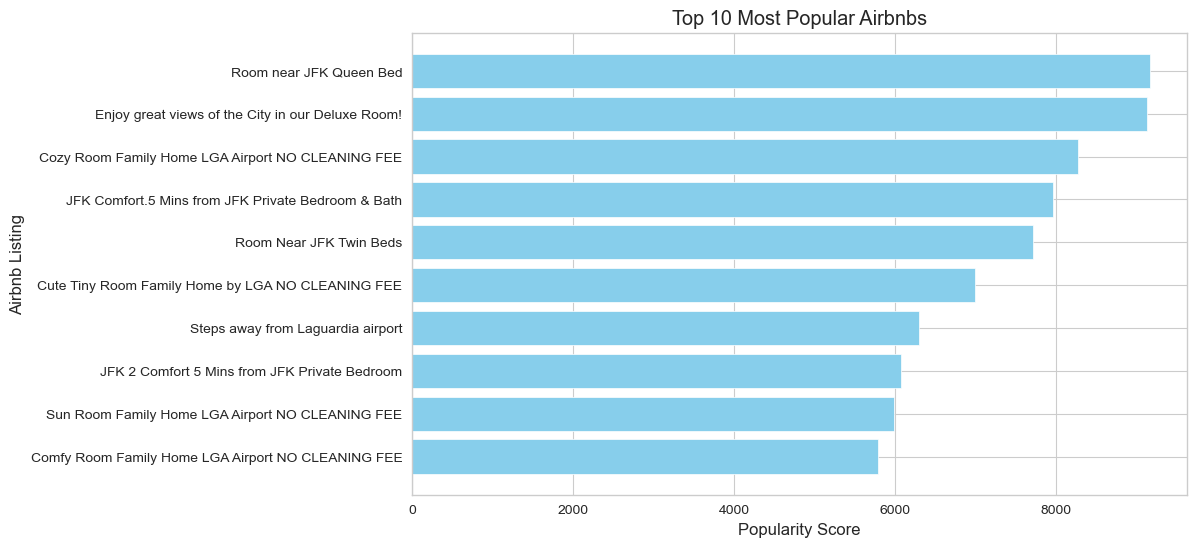

Neighborhood Groups for the Top 10 Most Popular Airbnbs:
                                                    name neighbourhood_group
11759                            Room near JFK Queen Bed              Queens
42075  Enjoy great views of the City in our Deluxe Room!           Manhattan
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE              Queens
27287  JFK Comfort.5 Mins from JFK Private Bedroom & ...              Queens
13495                            Room Near JFK Twin Beds              Queens
22469  Cute Tiny Room Family Home by LGA NO CLEANING FEE              Queens
10623                  Steps away from Laguardia airport              Queens
28651      JFK 2 Comfort 5 Mins from JFK Private Bedroom              Queens
21517   Sun Room Family Home LGA Airport NO CLEANING FEE              Queens
7086   Comfy Room Family Home LGA Airport NO CLEANING...              Queens


In [24]:
# Calculating popularity score
airbnb_data['popularity_score'] = airbnb_data['number_of_reviews'] * airbnb_data['reviews_per_month']

# Top 10 most popular airbnb
# Sorting the DataFrame by 'popularity_score' in descending order and select the top 10 rows
top_10_popular = airbnb_data.sort_values(by='popularity_score', ascending=False).head(10)

# Creating a bar plot to visualize the top 10 most popular Airbnbs
plt.figure(figsize=(10, 6))
plt.barh(top_10_popular['name'], top_10_popular['popularity_score'], color='skyblue')
plt.xlabel('Popularity Score')
plt.ylabel('Airbnb Listing')
plt.title('Top 10 Most Popular Airbnbs')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest popularity at the top
plt.show()

# Display the neighborhood group for the top 10 popular Airbnbs
print("Neighborhood Groups for the Top 10 Most Popular Airbnbs:")
print(top_10_popular[['name', 'neighbourhood_group']])

C:\Users\aadit\AppData\Local\Temp\ipykernel_27944\2291930194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data['price_category'] = airbnb_data['price'].apply(categorize_price)


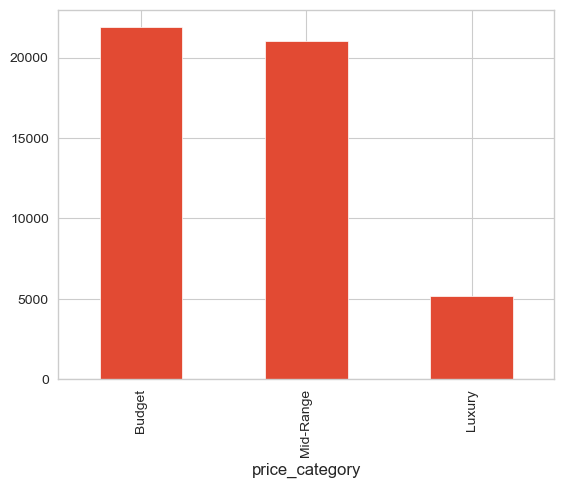

In [25]:
# Creating an attribute price_category
def categorize_price(price):
    if price < 100:
        return 'Budget'
    elif 100 < price < 300:
        return 'Mid-Range'
    else:
        return 'Luxury'

airbnb_data['price_category'] = airbnb_data['price'].apply(categorize_price)
airbnb_data['price_category'].value_counts().plot(kind='bar');

In [26]:
airbnb_data.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenue,popularity_score,price_category
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,54385,1.89,Mid-Range
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,79875,17.10,Mid-Range
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,54750,0.00,Mid-Range
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,17266,1252.80,Budget
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0,0.90,Budget


In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from IPython.display import display

# Latitude and longitude coordinates for the center of New York City
nyc_center = [40.7128, -74.0060]

# Create a Folium map centered on New York City
m = folium.Map(location=nyc_center, zoom_start=12)

# Load your Airbnb data with latitude, longitude, and price columns
# Replace 'latitude', 'longitude', 'price', and 'price_category' with your actual column names
data = airbnb_data[['latitude', 'longitude', 'price', 'price_category']]

# Define color mappings for price categories
color_mapping = {
    'Budget': 'green',
    'Mid-Range': 'orange',
    'Luxury': 'red'
}

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Iterate through the data and add custom markers for each Airbnb listing
for index, row in data.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    price = row['price']
    price_category = row['price_category']
    
    # Get the marker color based on the price category
    marker_color = color_mapping.get(price_category, 'blue')
    
    # Create a marker with custom color and the price as a tooltip
    marker = folium.Marker(
        location=[latitude, longitude],
        icon=folium.Icon(color=marker_color),
        tooltip=f'Price: ${price:.2f}'
    )
    
    # Add the marker to the marker cluster
    marker.add_to(marker_cluster)

# Display the map in the Jupyter Notebook
display(m)

In [44]:
m.save("NYC_prices.html")

In [ ]:
import folium
import pandas as pd
from folium import plugins
from IPython.display import display

# Creating a Folium map centered on New York City
nyc_center = [40.7128, -74.0060]
m = folium.Map(location=nyc_center, zoom_start=10)

# Loading the Airbnb data with the 'neighbourhood_group' and 'price' columns
data = airbnb_data[['neighbourhood_group', 'price']]

# Loading the GeoJSON file with neighborhood boundaries
geojson_path = 'nyc-zip-code-tabulation-areas-polygons.geojson'

# Creating a choropleth map using Folium
choropleth = folium.Choropleth(
    geo_data=geojson_path,
    data=data,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.borough',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Airbnb Price'
).add_to(m)

# Adding a legend to the map
folium.LayerControl().add_to(m)

# Displaying the map
display(m)
m.save('my_map.html')

In [30]:
df_label = airbnb_data[['price', 'price_category', 'revenue']]

print(df_label)

       price price_category  revenue
0        149      Mid-Range    54385
1        225      Mid-Range    79875
2        150      Mid-Range    54750
3         89         Budget    17266
4         80         Budget        0
...      ...            ...      ...
48890     70         Budget      630
48891     40         Budget     1440
48892    115      Mid-Range     3105
48893     55         Budget      110
48894     90         Budget     2070

[48128 rows x 3 columns]


In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
df=pd.read_csv('airbnb_dataset.csv')
anova_model = ols('price ~ C(PO_NAME)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                  sum_sq       df          F  PR(>F)
C(PO_NAME)  5.996007e+08    222.0  11.140585     0.0
Residual    9.510852e+09  39230.0        NaN     NaN


In [34]:
import geopandas as gpd

# Load GeoJSON data
geojson_file = "nyc-zip-code-tabulation-areas-polygons.geojson"
gdf = gpd.read_file(geojson_file)

C:\Users\aadit\AppData\Local\Temp\ipykernel_27944\713180181.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['PO_NAME']):


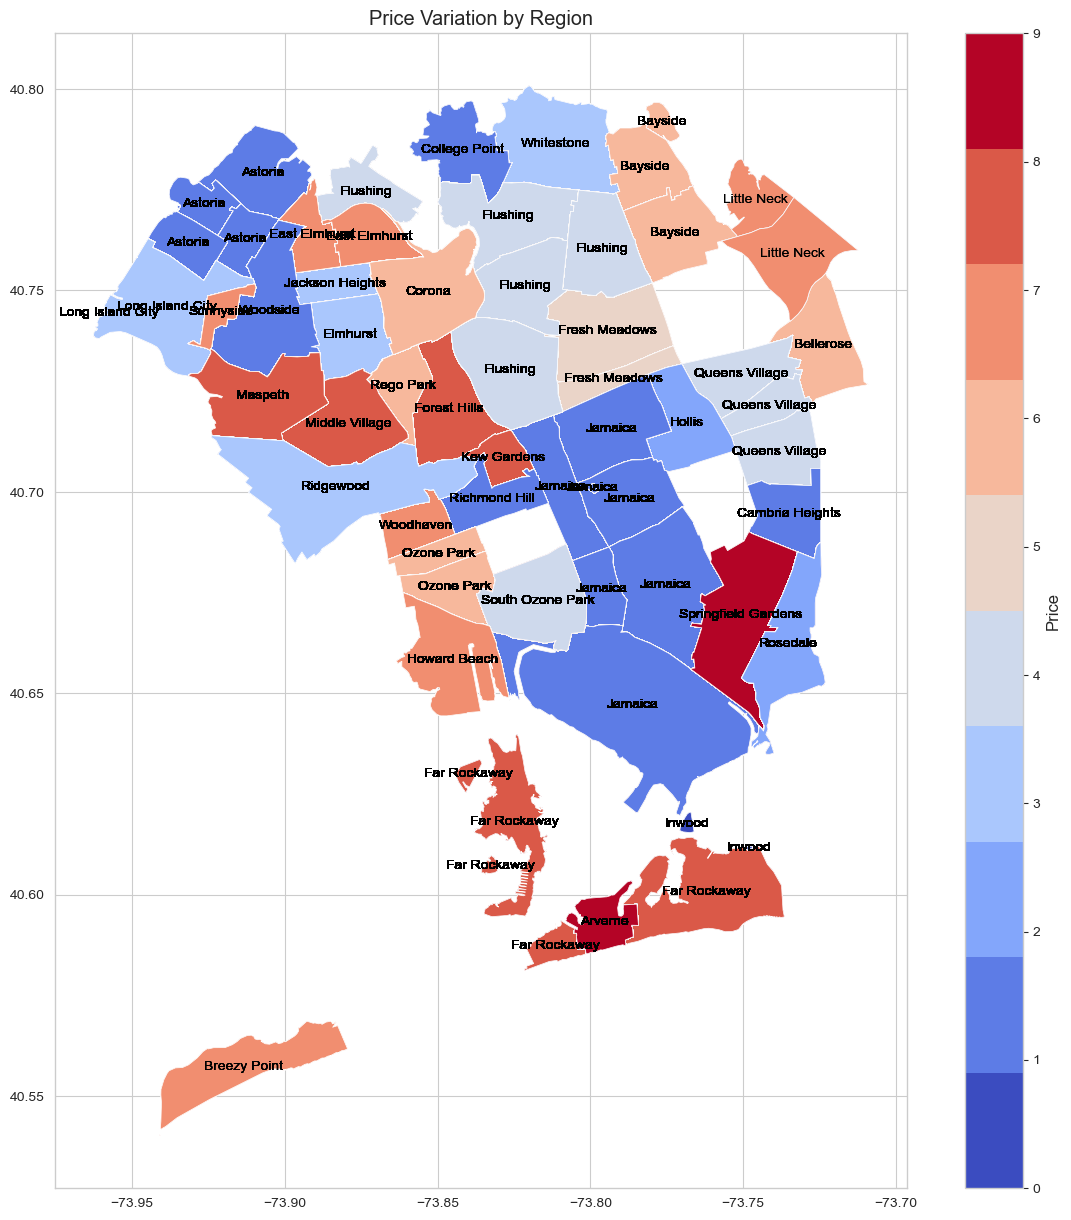

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge the GeoDataFrame and DataFrame on 'PO_NAME' column
merged_data = gdf.merge(df, on='PO_NAME', how='inner')

# Create a figure and axis for the map
fig, ax = plt.subplots(figsize=(15, 15))

# Define custom color bins and colormap
num_bins = 10
cmap = plt.get_cmap('coolwarm', num_bins)  # You can choose other colormaps

# Set the color boundaries based on price percentiles
price_percentiles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
price_values = merged_data['price'].quantile([p / 100 for p in price_percentiles])
merged_data['price_category'] = pd.cut(merged_data['price'], price_values, labels=False, include_lowest=True)

# Plot the data with the defined colormap
merged_data.plot(column='price_category', cmap=cmap, legend=True, ax=ax, legend_kwds={'label': "Price", 'orientation': 'vertical'})

# Add region labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['PO_NAME']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center', color='black')

# You can further adjust the color scheme, colormaps, and percentile values as needed
plt.title('Price Variation by Region')
plt.show()


in: 16568
room: 9349
bedroom: 7131
private: 6927
apartment: 6062
cozy: 4617
the: 3812
to: 3800
studio: 3725
brooklyn: 3593
apt: 3530
spacious: 3361
1: 3326
with: 3037
2: 3014
of: 2943
east: 2933
and: 2853
manhattan: 2810
&: 2788
park: 2589
sunny: 2526
beautiful: 2287
williamsburg: 2280
near: 2275


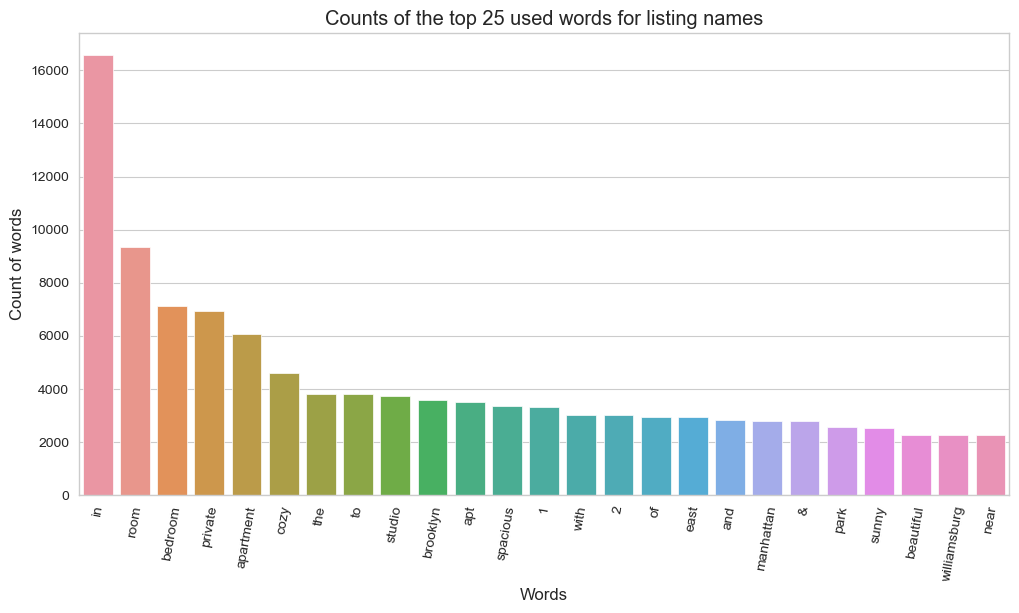

In [34]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'airbnb' is your DataFrame with a 'name' column

# Step 1: Extract and preprocess the name strings
names = airbnb_data['name'].astype(str)  # Convert to string type
names = names.str.lower()  # Convert to lowercase

# Step 2: Split the name strings into separate words
names_list = names.str.split()

# Step 3: Flatten the list of words
all_words = [word for sublist in names_list for word in sublist]

# Step 4: Count the occurrences of each word
word_counts = Counter(all_words)

# Step 5: Get the top 25 used words
top_words = word_counts.most_common(25)
for word, count in top_words:
    print(f"{word}: {count}")

# Step 6: Create a DataFrame for visualization
top_words_df = pd.DataFrame(top_words, columns=['Words', 'Count'])

# Step 7: Create a bar plot for visualization
plt.figure(figsize=(12, 6))
viz = sns.barplot(x='Words', y='Count', data=top_words_df)
viz.set_title('Counts of the top 25 used words for listing names')
viz.set_ylabel('Count of words')
viz.set_xlabel('Words')
viz.set_xticklabels(viz.get_xticklabels(), rotation=80)

plt.show()


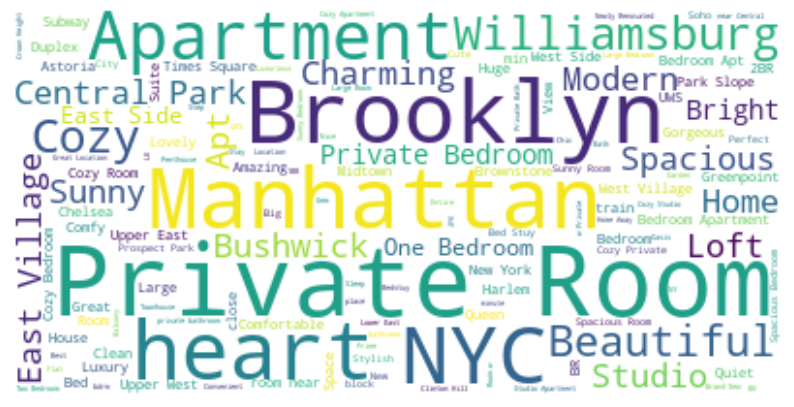

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

name_list = airbnb_data.name

# Joining the names into a single string
text = " ".join(str(name) for name in name_list)

# Creating and configure the WordCloud
wordcloud = WordCloud(max_words=200, background_color="white")

# Generating the word cloud image
wordcloud_image = wordcloud.generate(text)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
plt.show()


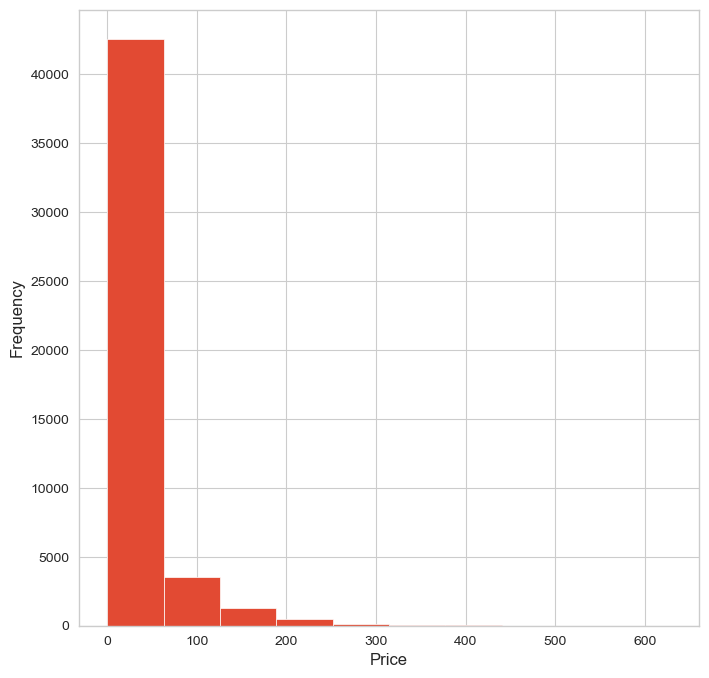

In [36]:
plt.figure(figsize=(8,8))
airbnb_data['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

In [37]:
print("\n",airbnb_data['neighbourhood_group'].nunique())
print("\n",airbnb_data['neighbourhood_group'].unique())
print("\n",airbnb_data['neighbourhood_group'].value_counts())


 5

 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

 neighbourhood_group
Manhattan        21082
Brooklyn         19948
Queens            5644
Bronx             1086
Staten Island      368
Name: count, dtype: int64


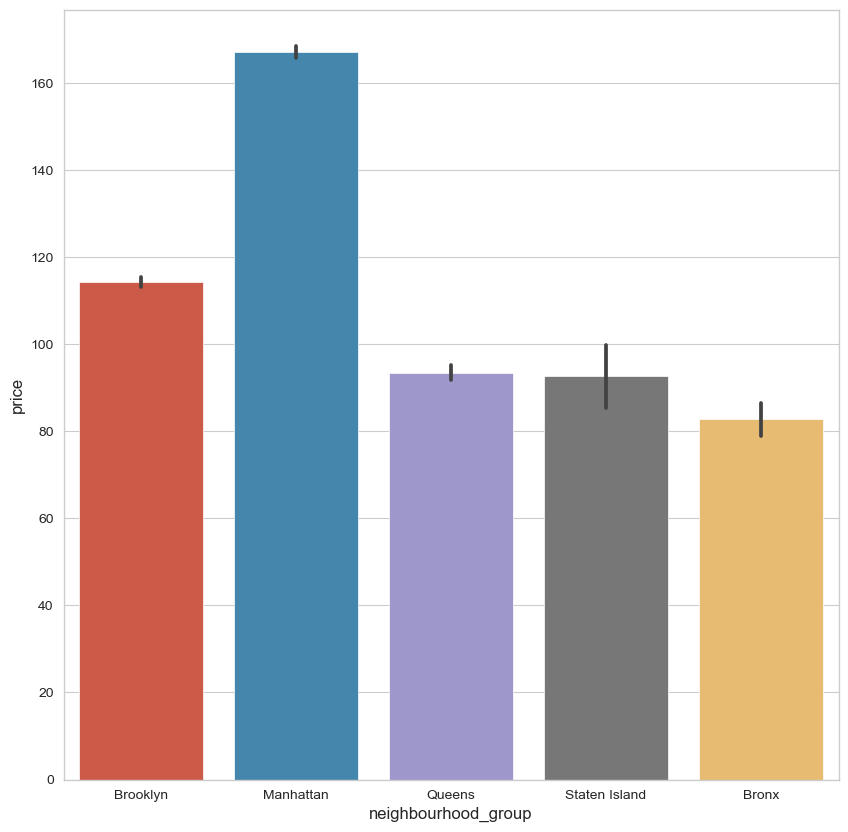

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(data=airbnb_data, x='neighbourhood_group', y='price')
plt.show()

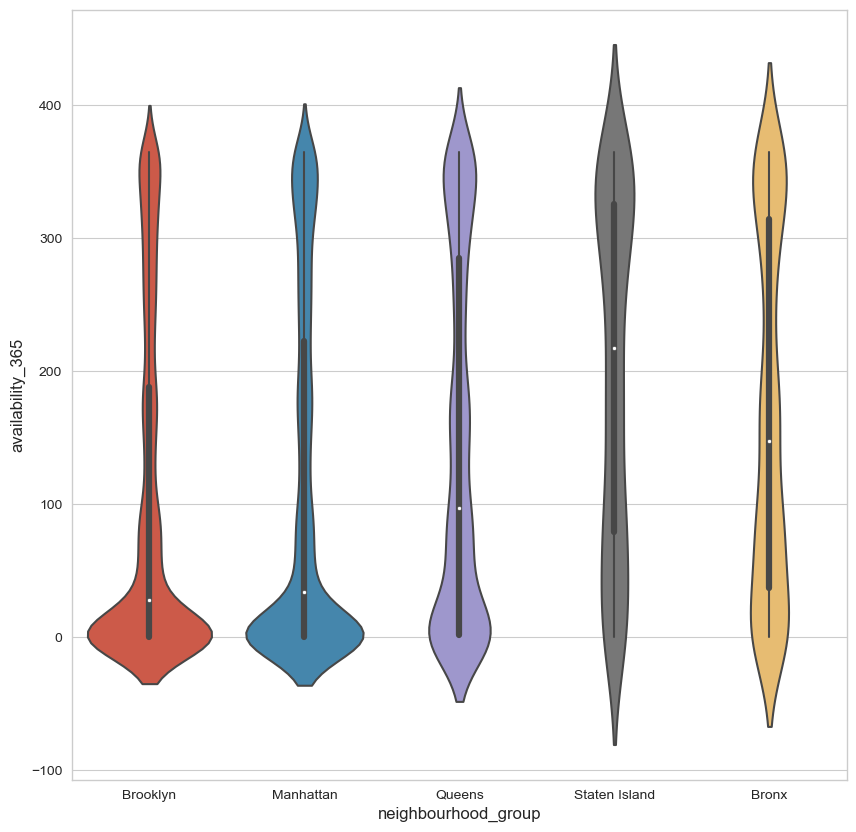

In [39]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=airbnb_data, x="neighbourhood_group", y="availability_365")
plt.show()

In [40]:
print("\n",airbnb_data['room_type'].nunique())
print("\n",airbnb_data['room_type'].unique())
print("\n",airbnb_data['room_type'].value_counts())


 3

 ['Private room' 'Entire home/apt' 'Shared room']

 room_type
Entire home/apt    24763
Private room       22213
Shared room         1152
Name: count, dtype: int64


In [41]:
airbnb_data.groupby("neighbourhood_group")["host_id"].count()

neighbourhood_group
Bronx             1086
Brooklyn         19948
Manhattan        21082
Queens            5644
Staten Island      368
Name: host_id, dtype: int64

In [42]:
airbnb_data.groupby("room_type")["price"].sum()

room_type
Entire home/apt    4547321
Private room       1831955
Shared room          73173
Name: price, dtype: int64

In [43]:
airbnb_data.groupby("room_type")["price"].sum()

room_type
Entire home/apt    4547321
Private room       1831955
Shared room          73173
Name: price, dtype: int64

In [44]:
airbnb_data.groupby("room_type")["number_of_reviews"].sum()

room_type
Entire home/apt    574040
Private room       537899
Shared room         19236
Name: number_of_reviews, dtype: int64

In [45]:
airbnb_data.groupby("neighbourhood_group")["room_type"].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         650
                     Entire home/apt      377
                     Shared room           59
Brooklyn             Private room       10102
                     Entire home/apt     9434
                     Shared room          412
Manhattan            Entire home/apt    12697
                     Private room        7908
                     Shared room          477
Queens               Private room        3365
                     Entire home/apt     2084
                     Shared room          195
Staten Island        Private room         188
                     Entire home/apt      171
                     Shared room            9
Name: count, dtype: int64

In [46]:
df = airbnb_data[["neighbourhood_group", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]]
df.shape

(48128, 8)

In [47]:
df.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1


In [48]:
ng = pd.get_dummies(df['neighbourhood_group'],drop_first=True)
ng.head(3)

,Brooklyn,Manhattan,Queens,Staten Island
0,True,False,False,False
1,False,True,False,False
2,False,True,False,False


In [49]:
df.drop(['neighbourhood_group'], axis = 1, inplace = True)

C:\Users\aadit\AppData\Local\Temp\ipykernel_26732\1508914121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['neighbourhood_group'], axis = 1, inplace = True)


In [50]:
print(df.shape)
df.head()

(48128, 7)


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,40.64749,-73.97237,Private room,149,1,9,6
1,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,40.80902,-73.94190,Private room,150,3,0,1
3,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,40.79851,-73.94399,Entire home/apt,80,10,9,1


In [51]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
lm = LabelEncoder()

In [52]:
df[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]] = scaler.fit_transform(airbnb_data[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]])

C:\Users\aadit\AppData\Local\Temp\ipykernel_26732\3499691277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]] = scaler.fit_transform(airbnb_data[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]])


In [53]:
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,-1.487208,-0.445323,Private room,0.158913,-0.293724,-0.323838,-0.033372
1,0.452758,-0.692047,Entire home/apt,0.967764,-0.293724,0.479981,-0.155068
2,1.465422,0.214125,Private room,0.169555,-0.195382,-0.524792,-0.185492
3,-0.798998,-0.172410,Entire home/apt,-0.479654,-0.293724,5.503844,-0.185492
4,1.273308,0.168892,Entire home/apt,-0.575439,0.148815,-0.323838,-0.185492


In [54]:
df_new = pd.concat([df, ng], axis = 1)

In [55]:
df_new.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,Brooklyn,Manhattan,Queens,Staten Island
0,-1.487208,-0.445323,Private room,0.158913,-0.293724,-0.323838,-0.033372,True,False,False,False
1,0.452758,-0.692047,Entire home/apt,0.967764,-0.293724,0.479981,-0.155068,False,True,False,False
2,1.465422,0.214125,Private room,0.169555,-0.195382,-0.524792,-0.185492,False,True,False,False
3,-0.798998,-0.172410,Entire home/apt,-0.479654,-0.293724,5.503844,-0.185492,True,False,False,False
4,1.273308,0.168892,Entire home/apt,-0.575439,0.148815,-0.323838,-0.185492,False,True,False,False


In [56]:
df_new['room_type'] = lm.fit_transform(airbnb_data['room_type'])

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split the data into training and testing sets
x = df_new.drop("room_type", axis=1)
y = df_new['room_type']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=111)

# Creating and fiting a logistic regression model
model = LogisticRegression()
model.fit(xtrain, ytrain)

# Making predictions on the test set
predict = model.predict(xtest)

# Printing the classification report
print("\nClassification Report:\n", metrics.classification_report(ytest, predict))

# Printing the confusion matrix
print("\nConfusion Matrix:\n", metrics.confusion_matrix(ytest, predict))

# Printing the accuracy score
accuracy = metrics.accuracy_score(ytest, predict)
print("\nAccuracy Score:", accuracy)



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      4959
           1       0.74      0.86      0.79      4423
           2       0.00      0.00      0.00       244

    accuracy                           0.79      9626
   macro avg       0.53      0.54      0.53      9626
weighted avg       0.78      0.79      0.78      9626


Confusion Matrix:
 [[3841 1118    0]
 [ 640 3783    0]
 [  19  225    0]]

Accuracy Score: 0.7920216081446083


C:\Users\aadit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aadit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aadit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Splitting the data into training and testing sets
x = df_new.drop("room_type", axis=1)
y = df_new['room_type']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=111)

# Creating and fitting a Decision Tree Classifier model
model = DecisionTreeClassifier(criterion="gini", max_depth=13)
model.fit(xtrain, ytrain)

# Making predictions on the test set
predict = model.predict(xtest)

# Printing the classification report
print("\nClassification Report:\n", metrics.classification_report(ytest, predict))

# Printing the confusion matrix
print("\nConfusion Matrix:\n", metrics.confusion_matrix(ytest, predict))

# Printing the accuracy score
accuracy = metrics.accuracy_score(ytest, predict)
print("\nAccuracy Score:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      4959
           1       0.81      0.82      0.81      4423
           2       0.62      0.34      0.44       244

    accuracy                           0.82      9626
   macro avg       0.76      0.67      0.70      9626
weighted avg       0.82      0.82      0.82      9626


Confusion Matrix:
 [[4211  738   10]
 [ 756 3627   40]
 [  29  132   83]]

Accuracy Score: 0.8228755453978808


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Splitting our data into training and testing sets
x = df_new.drop("room_type", axis=1)
y = df_new['room_type']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=111)

# Creating and fitting a RandomForestClassifier model
model = RandomForestClassifier()
model.fit(xtrain, ytrain)  # Use xtrain and ytrain to fit the model

# Making predictions on the test set
predict = model.predict(xtest)

# Printing the classification report
print("\nClassification Report:\n", metrics.classification_report(ytest, predict))

# Printing the confusion matrix
print("\nConfusion Matrix:\n", metrics.confusion_matrix(ytest, predict))

# Printing the accuracy score
accuracy = metrics.accuracy_score(ytest, predict)
print("\nAccuracy Score:", accuracy)



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4959
           1       0.84      0.84      0.84      4423
           2       0.89      0.32      0.47       244

    accuracy                           0.85      9626
   macro avg       0.86      0.68      0.73      9626
weighted avg       0.85      0.85      0.85      9626


Confusion Matrix:
 [[4410  547    2]
 [ 698 3717    8]
 [  21  145   78]]

Accuracy Score: 0.8523789736131311
